## Preparación del Conjunto de Datos
En esta sección, preparamos el conjunto de datos y definimos las secuencias de aminoácidos que analizaremos. Este proceso generará embeddings, lo cual puede llevar unos minutos.

Primero, seleccionamos las secuencias de interés. Luego, creamos los conjuntos de datos de entrenamiento y prueba, y preparamos los cargadores de datos para el entrenamiento y evaluación del modelo.


In [1]:
path_dataset_folder = "../DATASETS/"

In [ ]:
import os

# Limit the number of threads for various libraries
os.environ["OMP_NUM_THREADS"] = "48"  # For OpenMP
os.environ["MKL_NUM_THREADS"] = "48"  # For MKL (used by NumPy)
os.environ["NUMEXPR_NUM_THREADS"] = "48"  # For NumExpr
os.environ["VECLIB_MAXIMUM_THREADS"] = "48"  # For macOS Accelerate
os.environ["OPENBLAS_NUM_THREADS"] = "48"  # For OpenBLAS
os.environ["BLIS_NUM_THREADS"] = "48"  # For BLIS

# Set PyTorch threads
import torch
torch.set_num_threads(48)
torch.set_num_interop_threads(48)

# Verify the number of threads being used
import psutil

# Get the current process
current_process = psutil.Process(os.getpid())

# Get the number of threads
num_threads = current_process.num_threads()

print(f"Number of threads being used: {num_threads}")

In [2]:
import pandas as pd

df = pd.read_csv(f'{path_dataset_folder}predictor_dataset.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1261
Number of columns: 17


In [3]:
import numpy as np

# Load the embedded dataset and attention weights
prott5_embeddings = np.load(f"{path_dataset_folder}prott5_embeddings.npy", allow_pickle=True).item()
prott5_attention_weights = np.load(f"{path_dataset_folder}prott5_attention_layers.npy", allow_pickle=True).item()

print(f"prott5_embeddings_dict keys: {prott5_embeddings.keys()}")
print(f"prott5_attention_weights_dict keys: {prott5_attention_weights.keys()}")

# Transform the embeddings dictionary
prott5_embeddings_dict = {id_: emb for id_, emb in zip(prott5_embeddings['UniProt IDs'], prott5_embeddings['embeddings'])}

# Transform the attention weights dictionary
prott5_attention_weights_dict = {id_: attn for id_, attn in zip(prott5_attention_weights['UniProt IDs'], prott5_attention_weights['attention_layers'])}

# Print the transformed dictionaries to verify
print(f"Transformed prott5_embeddings keys: {list(prott5_embeddings_dict.keys())[:5]}")  # Print first 5 keys for brevity
print(f"Transformed prott5_attention_weights keys: {list(prott5_attention_weights_dict.keys())[:5]}")  # Print first 5 keys for brevity

prott5_embeddings_dict keys: dict_keys(['UniProt IDs', 'embeddings'])
prott5_attention_weights_dict keys: dict_keys(['UniProt IDs', 'attention_layers'])
Transformed prott5_embeddings keys: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']
Transformed prott5_attention_weights keys: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']


In [4]:
from project_root.dataset import protein_dataset
import importlib

# Reload the module (not the class)
importlib.reload(protein_dataset)

# Now import the class
from project_root.dataset.protein_dataset import ProteinDataset

# Create an instance of ProteinDataset
protein_dataset = ProteinDataset(df,
                                 embeddings=prott5_embeddings_dict, 
                                 attention_weights=prott5_attention_weights_dict)


Checking consistency...
Inconsistencies detected but not resolved. Consider enabling `solve_inconsistencies=True`.
Consistency checked.

ProteinDataset Report:
 - Number of samples: 1261
 - Number of embeddings: 1219
 - Number of attention weights: 1219
 - Target column: Class
 - ID column: UniProt IDs
 - Save path: ./OUTPUTS/



In [ ]:
# Plot TSNE for embeddings
protein_dataset.plot_tsne(attribute='Class', combined=False)

# Plot TSNE for combined embeddings and attention weights
protein_dataset.plot_tsne(attribute='Class', combined=True)

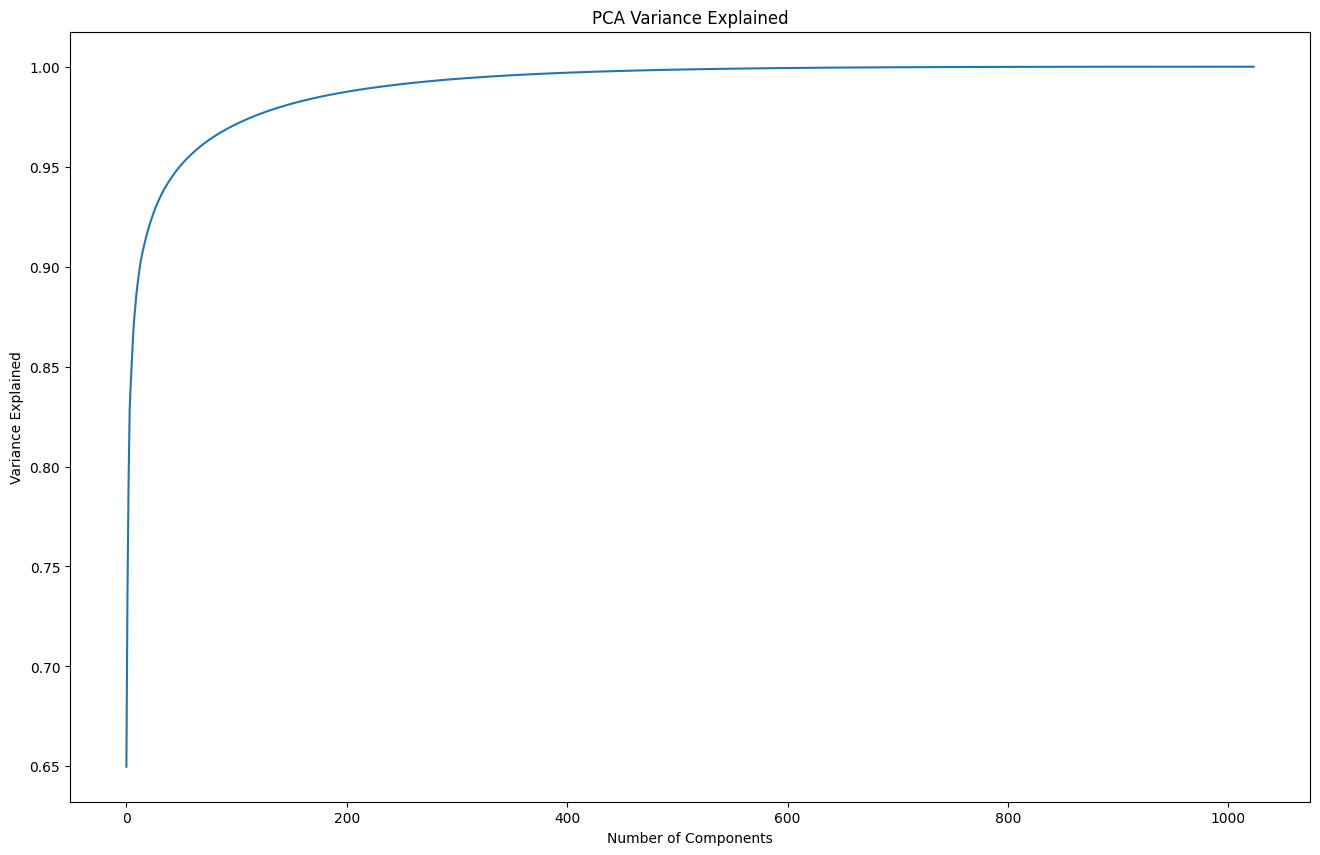

In [ ]:
# Plot PCA variance explained for embeddings
protein_dataset.plot_pca_variance(combined=False)

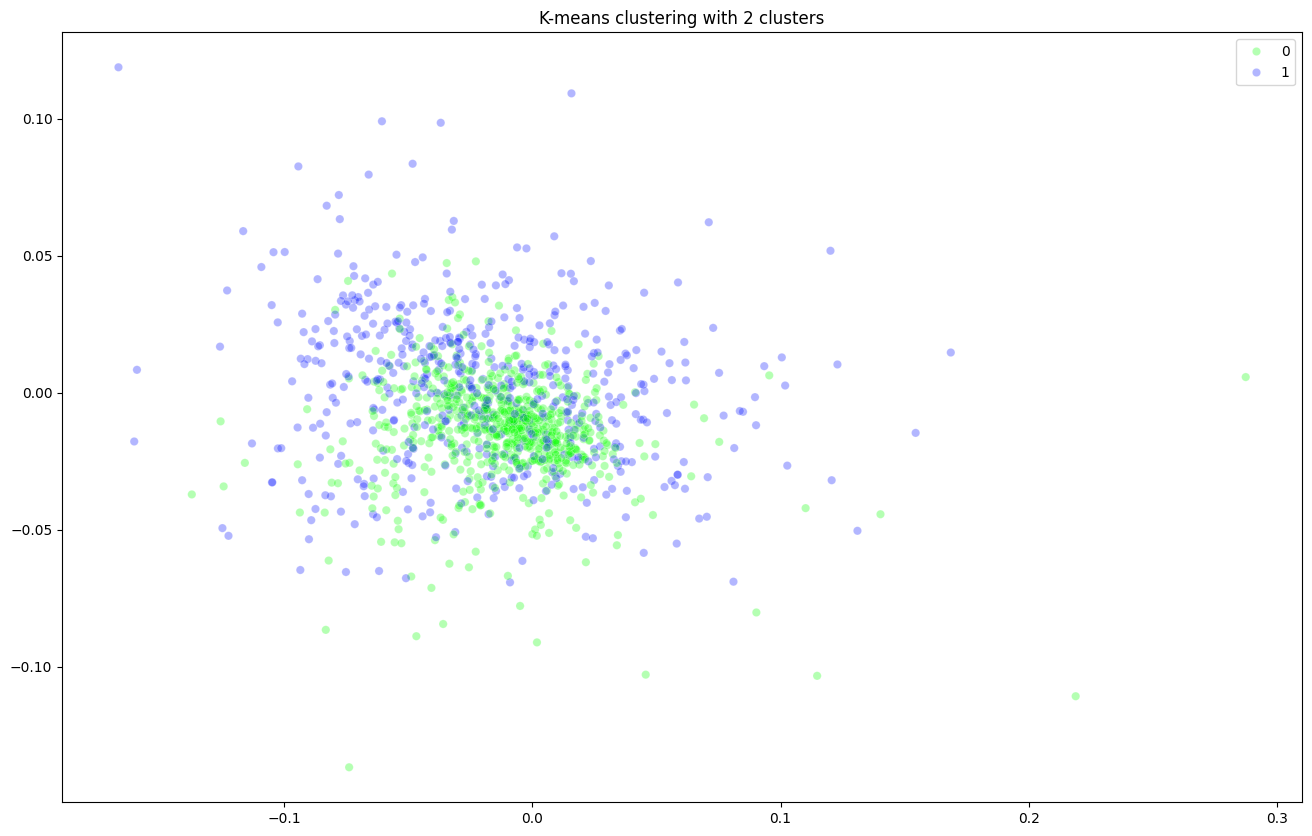

In [10]:
# Plot k-means clustering for embeddings
protein_dataset.plot_kmeans(n_clusters=2, combined=False)